<a href="https://colab.research.google.com/github/RubenMcCarty/Machine-Learning-con-Python-001/blob/master/METRICAS_EVALUACION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MSc. Rubén Quispe**

#*REGRESIÓN*

#MSE-Mean Squared Error - ERROR CUADRÁTICO MEDIO

Es quizás la métrica más simple y común para la evaluación de regresión, pero también es probablemente la menos útil. Se define por la ecuación.

 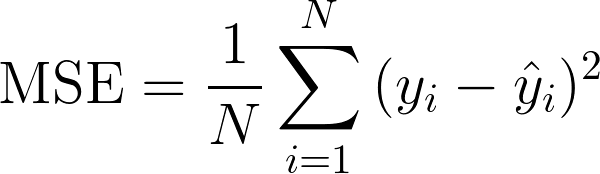

donde yᵢ es el resultado real esperado y ŷᵢ es la predicción del modelo.

MSE básicamente mide el error cuadrado promedio de nuestras predicciones. Para cada punto, calcula la diferencia cuadrada entre las predicciones y el objetivo y luego promedia esos valores.

Cuanto mayor sea este valor, peor es el modelo. Nunca es negativo, ya que estamos cuadrando los errores de predicción individuales antes de sumarlos, pero sería cero para un modelo perfecto.

Ventaja:
Útil si tenemos valores inesperados que nos deberían interesar. Muy alto o bajo valor que debemos prestar atención.

Desventaja:
Si hacemos una predicción muy mala, la cuadratura empeorará aún más el error y puede sesgar la métrica para sobreestimar la maldad del modelo. Este es un comportamiento particularmente problemático si tenemos datos ruidosos (es decir, los datos que por cualquier motivo no son del todo confiables).

Incluso un modelo “perfecto” puede tener un MSE alto en esa situación. Por lo que es difícil juzgar qué tan bien modelo está realizando.

Por otro lado, si todos los errores son pequeños, o más bien, más pequeños que 1, se siente el efecto contrario: podemos subestimar la maldad del modelo.

Tenga en cuenta que si queremos tener una predicción constante, la mejor será el valor medio de los valores objetivo. Se puede encontrar estableciendo la derivada de nuestro error total con respecto a esa constante a cero, y descúbrela a partir de esta ecuación.


In [ ]:
#MSE-Mean Squared Error 

X = [20, 21, 22, 23, 24, 25]
Y = [23, 21, 26, 22, 25, 24]
Y_BAR = [22.54, 22.91, 23.28, 23.65, 24.02, 24.39]

# Core Python

n = len(X) # Use length of either X or Y to get number of elements
s = 0
for i in range(0,n):
    s += (Y[i] - Y_BAR[i])**2
MSE = s/n
print ("MSE using Python: %", MSE)

# Using Scikit-Learn Library

from sklearn.metrics import mean_squared_error

MSE_sci = mean_squared_error(Y, Y_BAR)
print ("MSE using Sklearn: % ", MSE_sci)

# Using Numpy

import numpy as np

MSE_numpy = np.mean(np.square(np.subtract(Y,Y_BAR)))
print ("MSE using Numpy: % ", MSE_numpy)

MSE using Python: % 2.5155166666666653
MSE using Sklearn: %  2.5155166666666653
MSE using Numpy: %  2.5155166666666653


#MAE: Mean Absolute Error - ERROR ABSOLUTO MEDIO

En MAE, el error se calcula como un promedio de diferencias absolutas entre los valores objetivo y las predicciones. El MAE es una puntuación lineal, lo que significa que todas las diferencias individuales se ponderan por igual en el promedio. Por ejemplo, la diferencia entre 10 y 0 será el doble de la diferencia entre 5 y 0. Sin embargo, lo mismo no es cierto para RMSE. Matemáticamente, se calcula utilizando esta fórmula:

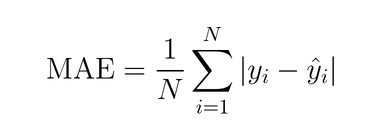

Lo importante de esta métrica es que penaliza errores enormes que no tan mal como lo hace MSE. Por lo tanto, no es tan sensible a los valores atípicos como el error cuadrático medio.


 
El MAE se usa ampliamente en finanzas, donde el error de $ 10 suele ser exactamente dos veces peor que el error de $ 5. Por otro lado, la métrica de MSE piensa que el error de $ 10 es cuatro veces peor que el error de $ 5. MAE es más fácil de justificar que RMSE.

Otra cosa importante acerca de MAE es sus gradientes con respecto a las predicciones. El gradiend es una función de pasos y toma -1 cuando Y_hat es más pequeño que el objetivo y +1 cuando es más grande.

Ahora, el gradiente no se define cuando la predicción es perfecta, porque cuando Y_hat es igual a Y, no podemos evaluar el gradiente. No está definido.

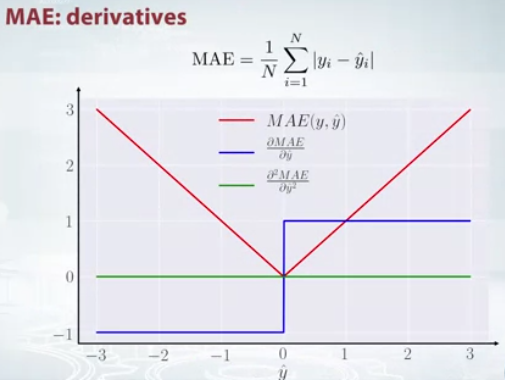


Entonces, formalmente, el MAE no es diferenciable, pero de hecho, con qué frecuencia sus predicciones miden perfectamente el objetivo. Incluso si lo hacen, podemos escribir una condición de IF simple y un cero de retorno cuando sea el caso y, de lo contrario, a través del gradiente. También sepa que la segunda derivada es cero en todas partes y no está definida en el punto cero.

Tenga en cuenta que si queremos tener una predicción constante, la mejor será el valor de la mediana de los valores objetivo. Se puede encontrar estableciendo la derivada de nuestro error total con respecto a esa constante a cero, y descúbrela a partir de esta ecuación.


In [ ]:
#EJEMPLO
X = [20, 21, 22, 23, 24, 25]
Y = [23, 21, 26, 22, 25, 24]
Y_BAR = [22.54, 22.91, 23.28, 23.65, 24.02, 24.39]

# Core Python

n = len(X) # Use length of either X or Y to get number of elements
s = 0
for i in range(0,n):
    s += abs(Y[i] - Y_BAR[i])
MAE = s/n
print ("MAE using Python: %", MAE)

# Using Scikit-Learn Library

from sklearn.metrics import mean_absolute_error

MAE_sci = mean_absolute_error(Y, Y_BAR)
print ("MAE using Sklearn: % ", MAE_sci)

# Using Numpy

import numpy as np

MAE_numpy = np.mean(np.abs(np.subtract(Y,Y_BAR)))
print ("MAE using Numpy: % ", MAE_numpy)


MAE using Python: % 1.3516666666666666
MAE using Sklearn: %  1.3516666666666666
MAE using Numpy: %  1.3516666666666666


#RMSE: Root Mean Squared Error - ERROR CUADRÁTICO MEDIO

RMSE es solo la raíz cuadrada de MSE. La raíz cuadrada se introduce para hacer que la escala de los errores sea igual a la escala de los objetivos.

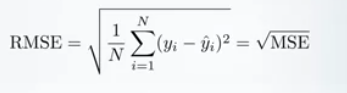

Ahora, es muy importante entender en qué sentido RMSE es similar a MSE y cuál es la diferencia.

Primero, son similares en términos de sus minimizadores, cada minimizador de MSE es también un minimizador para RMSE y viceversa, ya que la raíz cuadrada es una función que no disminuye. Por ejemplo, si tenemos dos conjuntos de predicciones, A y B, y decimos que el MSE de A es mayor que el MSE de B, entonces podemos estar seguros de que RMSE de A es mayor que RMSE de B. Y también funciona en la dirección opuesta .

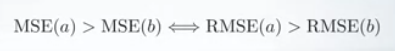

¿Qué significa para nosotros?
Significa que, si la métrica objetivo es RMSE, aún podemos comparar nuestros modelos utilizando MSE, ya que MSE ordenará los modelos de la misma manera que RMSE. Así podemos optimizar MSE en lugar de RMSE.

De hecho, es más fácil trabajar con MSE, por lo que todos usan MSE en lugar de RMSE. También un poco de diferencia entre los dos para los modelos basados ​​en gradientes.

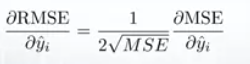

Significa que viajar a lo largo del gradiente MSE es equivalente a viajar a lo largo del gradiente RMSE, pero con una tasa de flujo diferente y la tasa de flujo depende de la puntuación de MSE en sí.

Entonces, aunque RMSE y MSE son realmente similares en términos de puntuación de modelos, pueden no ser intercambiables de forma inmediata para los métodos basados ​​en gradientes. Probablemente tengamos que ajustar algunos parámetros como la tasa de aprendizaje.




In [ ]:
#ejemplo
X = [20, 21, 22, 23, 24, 25]
Y = [23, 21, 26, 22, 25, 24]
Y_BAR = [22.54, 22.91, 23.28, 23.65, 24.02, 24.39]

# Core Python
from math import sqrt

n = len(X) # Use length of either X or Y to get number of elements
s = 0
for i in range(0,n):
    s += (Y[i] - Y_BAR[i])**2
RMSE = sqrt(s/n)
print ("RMSE using Python: %", RMSE)

# Using Scikit-Learn Library

from sklearn.metrics import mean_squared_error

RMSE_sci = sqrt(mean_squared_error(Y, Y_BAR))
print ("RMSE using Sklearn: % ", RMSE_sci)

# Using Numpy

import numpy as np

RMSE_numpy = np.sqrt(np.mean(np.square(np.subtract(Y,Y_BAR))))
print ("RMSE using Numpy: % ", RMSE_numpy)

RMSE using Python: % 1.5860380407375685
RMSE using Sklearn: %  1.5860380407375685
RMSE using Numpy: %  1.5860380407375685


#RAE: Relatve Absolute Error - ERROR ABSOLUTO RELATIVO

es la diferencia absoluta relativa entre los valores esperados y los reales; es relativa porque la diferencia media se divide por la media aritmética.

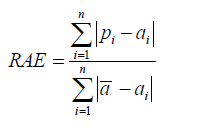

In [ ]:
#ejemplo
X = [20, 21, 22, 23, 24, 25]
Y = [23, 21, 26, 22, 25, 24]
Y_BAR = [22.54, 22.91, 23.28, 23.65, 24.02, 24.39]

# Using Numpy

import numpy as np

RAE_numpy = np.sum(np.abs(np.subtract(Y,Y_BAR))) / np.sum(np.abs(np.subtract(Y, np.mean(Y))))
print ("RAE using Numpy: % ", RAE_numpy)

RAE using Numpy: %  0.9011111111111111


#RSE: Relative Squared Error - ERROR CUADRÁTICO RELATIVO

A diferencia de RMSE, el error cuadrático relativo (RSE) se puede comparar entre modelos cuyos errores se miden en las diferentes unidades.

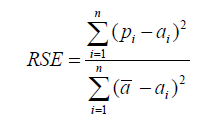

In [ ]:
#ejemplo
X = [20, 21, 22, 23, 24, 25]
Y = [23, 21, 26, 22, 25, 24]
Y_BAR = [22.54, 22.91, 23.28, 23.65, 24.02, 24.39]

# Using Numpy

import numpy as np

RSE_numpy = np.sum(np.square(np.subtract(Y,Y_BAR))) / np.sum(np.square(np.subtract(Y, np.mean(Y))))
print ("RSE using Numpy: % ", RSE_numpy)

RSE using Numpy: %  0.8624628571428568


#R-squared - R cuadrado  (R²)

El coeficiente de determinación, o R² (a veces leído como R-dos), es otra medida que podemos usar para evaluar un modelo y está estrechamente relacionada con la MSE, pero tiene la ventaja de estar libre de escala  , no importa si Los valores de salida son muy grandes o muy pequeños, el R² siempre estará entre -∞ y 1.

Cuando R² es negativo, significa que el modelo es peor que predecir la media.

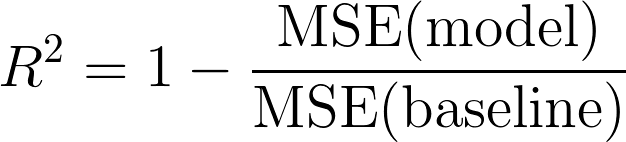



In [ ]:
 from sklearn.metrics import r2_score
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
r2_score(y_true, y_pred)

0.9486081370449679

#*CLASIFICACIÓN*

#Jaccard index

El índice de Jaccard ( IJ ) o coeficiente de Jaccard ( IJ ) mide el grado de similitud entre dos conjuntos, sea cual sea el tipo de elementos.

La formulación es la siguiente:

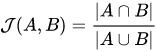

Es decir, la cardinalidad de la intersección de ambos conjuntos dividida por la cardinalidad de su unión.

Siempre toma valores entre 0 y 1, correspondiente este último a la igualdad total entre ambos conjuntos.

In [ ]:
import numpy as np
from sklearn.metrics import jaccard_score
y_true = np.array([[0, 1, 1],
                  [1, 1, 0]])
y_pred = np.array([[1, 1, 1],
                  [1, 0, 0]])
jaccard_score(y_true[0], y_pred[0])




0.6666666666666666

#F1-Score

Siempre es mejor establecer como científico de datos una métrica de evaluación de un solo número para que su equipo luego optimice.

La precisión es un ejemplo de una métrica de evaluación de un solo número y le permite comparar rápidamente dos clasificadores.

Si el clasificador A obtiene el 97% de precisión y el clasificador B obtiene el 90% de precisión, juzgamos que el clasificador A es superior.

Por el contrario, precisión y recall no es una medida de evaluación de un solo número: da dos 2 números para evaluar su clasificador.

In [ ]:
from sklearn.metrics import f1_score
y_true = [0, 1, 2, 0, 1, 2]
y_pred = [0, 2, 1, 0, 0, 1]
f1_score(y_true, y_pred, average='macro')

f1_score(y_true, y_pred, average='micro')

f1_score(y_true, y_pred, average='weighted')

f1_score(y_true, y_pred, average=None)

y_true = [0, 0, 0, 0, 0, 0]
y_pred = [0, 0, 0, 0, 0, 0]
f1_score(y_true, y_pred, zero_division=1)

1.0

#precisión score

La precisión es la relación donde está el número de verdaderos positivos y el número de falsos positivos. La precisión es intuitivamente la capacidad del clasificador de no etiquetar como positiva una muestra que es negativa.tp / (tp + fp)tpfp

El mejor valor es 1 y el peor valor es 0.

In [ ]:
from sklearn.metrics import precision_score
y_true = [0, 1, 2, 0, 1, 2]
y_pred = [0, 2, 1, 0, 0, 1]
precision_score(y_true, y_pred, average='macro')


0.2222222222222222

#Recall, Sensibilidad o TPR (Tasa de True Positive)

Es el número de elementos identificados correctamente como positivos del total de positivos verdaderos.

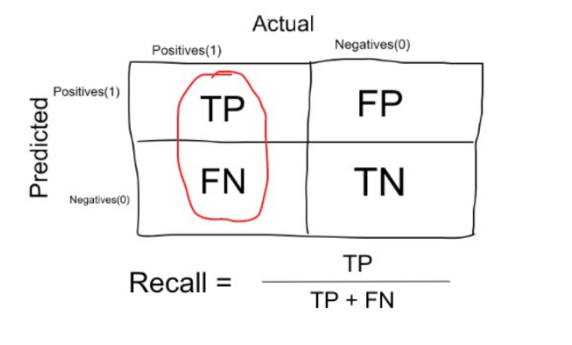

Por lo tanto, para nuestro ejemplo: Rellamada = 20 / (20 + 10) = 20/30

In [ ]:
from sklearn.metrics import recall_score
y_true = [0, 1, 2, 0, 1, 2]
y_pred = [0, 2, 1, 0, 0, 1]
recall_score(y_true, y_pred, average='macro')

0.3333333333333333

#LOG IOSS

Pérdida de registros, también conocida como pérdida logística o pérdida de entropía cruzada.

Ésta es la función de pérdida utilizada en la regresión logística (multinomial) y sus extensiones, como las redes neuronales, definida como la probabilidad logarítmica negativa de un modelo logístico que devuelve y_predprobabilidades para sus datos de entrenamiento y_true. La pérdida de registros solo se define para dos o más etiquetas. Para una sola muestra con etiqueta verdadera <math xmlns="http://www.w3.org/1998/Math/MathML">
  <mi>y</mi>
  <mo>&#x2208;</mo>
  <mo fence="false" stretchy="false">{</mo>
  <mn>0</mn>
  <mo>,</mo>
  <mn>1</mn>
  <mo fence="false" stretchy="false">}</mo>
</math>

y una estimación de probabilidad <math xmlns="http://www.w3.org/1998/Math/MathML">
  <mi>p</mi>
  <mo>=</mo>
  <mi>Pr</mi>
  <mo data-mjx-texclass="NONE">&#x2061;</mo>
  <mo stretchy="false">(</mo>
  <mi>y</mi>
  <mo>=</mo>
  <mn>1</mn>
  <mo stretchy="false">)</mo>
</math> la pérdida de registro es: 
<math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <msub>
    <mi>L</mi>
    <mrow>
      <mi>log</mi>
    </mrow>
  </msub>
  <mo stretchy="false">(</mo>
  <mi>y</mi>
  <mo>,</mo>
  <mi>p</mi>
  <mo stretchy="false">)</mo>
  <mo>=</mo>
  <mo>&#x2212;</mo>
  <mo stretchy="false">(</mo>
  <mi>y</mi>
  <mi>log</mi>
  <mo data-mjx-texclass="NONE">&#x2061;</mo>
  <mo stretchy="false">(</mo>
  <mi>p</mi>
  <mo stretchy="false">)</mo>
  <mo>+</mo>
  <mo stretchy="false">(</mo>
  <mn>1</mn>
  <mo>&#x2212;</mo>
  <mi>y</mi>
  <mo stretchy="false">)</mo>
  <mi>log</mi>
  <mo data-mjx-texclass="NONE">&#x2061;</mo>
  <mo stretchy="false">(</mo>
  <mn>1</mn>
  <mo>&#x2212;</mo>
  <mi>p</mi>
  <mo stretchy="false">)</mo>
  <mo stretchy="false">)</mo>
</math>

In [ ]:
from sklearn.metrics import log_loss
log_loss(["spam", "ham", "ham", "spam"],[[.1, .9], [.9, .1], [.8, .2], [.35, .65]])

0.21616187468057912

#MATRIZ DE CONFUSIÓN

Confusión o error Matrix es una tabla que describe el rendimiento de un modelo supervisado de Machine Learning en los datos de prueba, donde se desconocen los verdaderos valores. Se llama “matriz de confusión” porque hace que sea fácil detectar dónde el sistema está confundiendo dos clases.


1. True Positives (TP): cuando la clase real del punto de datos era 1 (Verdadero) y la predicha es también 1 (Verdadero)
2. Verdaderos Negativos (TN): cuando la clase real del punto de datos fue 0 (Falso) y el pronosticado también es 0 (Falso).
3. False Positives (FP): cuando la clase real del punto de datos era 0 (False) y el pronosticado es 1 (True).
4. False Negatives (FN): Cuando la clase real del punto de datos era 1 (Verdadero) y el valor predicho es 0 (Falso).

El escenario ideal que todos queremos es que el modelo dé 0 False Positives y 0 False Negatives.

Por ejemplo para la imagen siguiente se ilustra el resultado de una función “confusion_matrix” de sklearn, utilizada para un problema de clasificación en el que estamos prediciendo si una persona tiene cáncer o no.

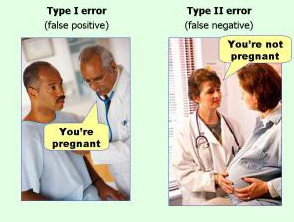

Vamos a dar una etiqueta a nuestra variable de destino:

1 : cuando una persona tiene cáncer

0: Cuando una persona NO está teniendo cáncer.

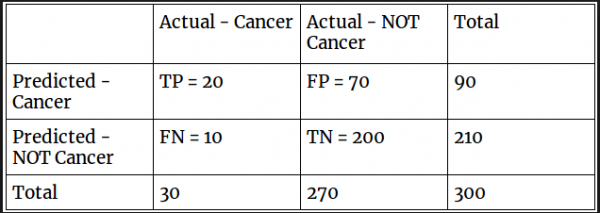

La matriz de confusión en en sí mismo no es una medida de desempeño como tal, pero casi todas las métricas de desempeño se basan en la matriz de confusión y los números dentro de ella.

Minimizando falsos negativos VS falsos positivos
En el ejemplo del problema de detección de cáncer digamos que de 100 personas, solo 5 personas tienen cáncer Definitivamente queremos capturar todos los casos de cáncer y podríamos terminar haciendo una clasificación cuando la persona que realmente NO tiene cáncer se clasifica como cancerosa.

Esto podría estar bien ya que perder a un paciente con cáncer será un gran error ya que no se realizarán más exámenes. Por lo tanto, es mejor minimizar los falsos negativos en este caso

Consideremos ahora un problema de detección de spam por correo electrónico y que está esperando un correo electrónico importante como una respuesta de un reclutador o esperando una carta de admisión de una universidad.

Asigne una etiqueta a la variable de destino y diga:

1:”El correo electrónico es un correo no deseado” y

0:”El correo electrónico no es un correo no deseado”

Supongamos que el Modelo clasifica ese correo electrónico importante que usted están esperando desesperadamente, como Spam (caso de falso positivo).

Por lo tanto, en el caso de la clasificación de correos electrónicos no deseados, minimizar los falsos positivos es más importante que los falsos negativos.



In [ ]:
 from sklearn.metrics import confusion_matrix
y_true = [2, 0, 2, 2, 0, 1]
y_pred = [0, 0, 2, 2, 0, 2]
confusion_matrix(y_true, y_pred)

array([[2, 0, 0],
       [0, 0, 1],
       [1, 0, 2]])